Defining a neural network

In Keras, Sequential() is used to define multilayer perceptrons. Layers are listed one at a time within Sequential(), starting with the input layer and ending with the output layer. The first layer is specified using layers.Input(), and subsequent layers in a multilayer perceptron should be specified using layers.Dense(). The number of nodes and activation function are specified in each layer. The final layer should be a dense layer containing either a single node (regression and binary classification) or a node for each class (multiclass classification). Layer parameters are described in the table below and in the Keras documentation.

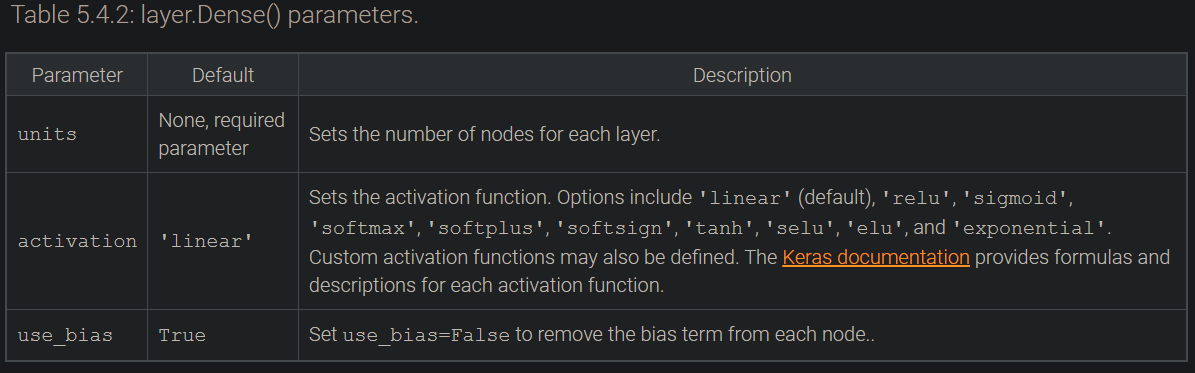

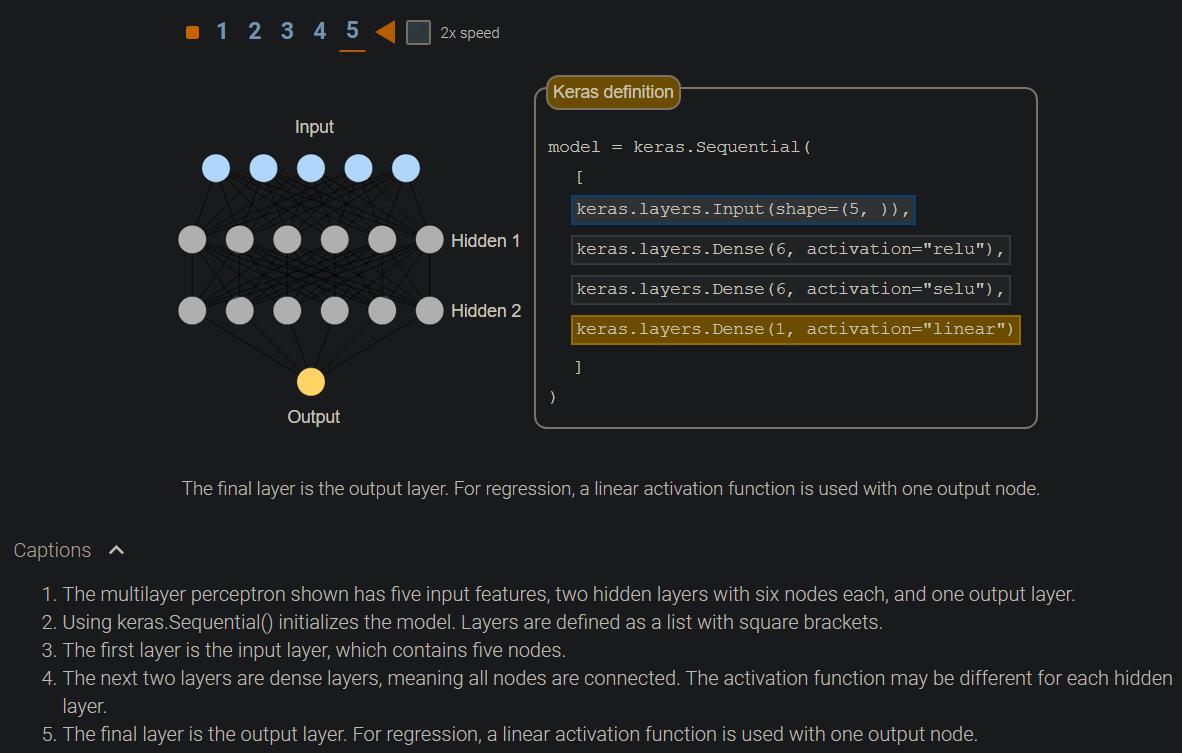

In [1]:
import numpy as np
import pandas as pd
import os

os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
# The backend must be set before importing keras, not after
import keras as keras
import keras.datasets.fashion_mnist

In [3]:
# Load built-in Fashion MNIST
(Xtrain, ytrain), (Xtest, ytest) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range and make sure all have same type
Xtrain = Xtrain.reshape(60000, 784).astype('float32') / 255
Xtest = Xtest.reshape(10000, 784).astype('float32') / 255
ytrain = ytrain.astype('float32')
ytest = ytest.astype('float32')

In [4]:
# Define the model structure using keras.Sequential
model = keras.Sequential(
    [
        keras.layers.Input(shape=(784, )), # Leaving the space after the comma blank allows Keras to fill in the rest of the network's dimensions through subsequent layers.
        # Hidden layer 1 = 256 nodes, linear activation
        keras.layers.Dense(256, activation='linear'),
        # Hidden layer 2: 128 nodes, linear activation
        keras.layers.Dense(128, activation='linear'),
        # Output layer: 10 nodes, one per class
        keras.layers.Dense(10, activation='softmax'),
    ]
)

In [5]:
# View model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)